### projet:1


# Prédiction du prix d'une voiture en fonction des caractéristiques

## Importation des librairies

In [1]:

import pandas as pd

import numpy as np
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Importation des données

In [19]:
filename="https://raw.githubusercontent.com/JosueAfouda/Prix-Voiture/master/imports-85.data"

df= pd.read_csv(filename, header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


il y'a pas de nom  de colonnes dans ce jeu de données.on va lefaire.

appreentissage automatique supervisé: LA REGRESSION.Ici , la variable cible est continue.exemple: si on veut le prix d'une maison, le bénéfice d'une entreprise, le PIB(produit intérieur brut)d'un pays, le nombre de vélos loués à une donnée,...on utilisera des algorithmes de regression étant donné que ces variables sontquantitatives.

L'objectif est de construire un modèle de régression linèaire qui prédit le prix de vente d(une voiture en fonction de ses caractéristiques.

In [20]:
headers=["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]
headers

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [21]:
df= pd.read_csv(filename, header=None , names=headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
sur lenet les valeurs manquantes sont représentées par un "?"

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# Nettoyage des données #

gestion des valeurs manquantes

In [36]:
df.replace("?", np.nan,  inplace=True)

In [37]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

    d'après la description du jeu de données les variables "normalized-losses", "bore ", "stroke", "horsepower", et peak-rpm sont des variables continues. la variable est une variable catégorielle dont nous allons la remplacer ses deux valeurs manquantes par  le mode de la colonne.
    
    
    La variable price est notre variable donc nous allons simplement supprimer les valeurs manquantesde cettE colonne.
    

# Imputation par la moyenne des colonnes "normalized-losses", "bore ", "stroke", "horsepower", et peak-rpm

In [42]:
def imput_avg(x):
    avg=x.astype('float').mean(axis= 0)
    return x.replace(np.nan, avg, inplace=True) 
    
for colonne in ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm"] :
    imput_avg(df[colonne])

In [47]:
# Imputation par la mode de la variable num-of-doors

mode=df["num-of-doors"].value_counts().idxmax()
df["num-of-doors"].replace(np.nan, mode, inplace=True)

In [48]:
# suppression des lignes de df ou il y'a les données manquantes dans la variable price

df.dropna(subset=["price"], axis=0, inplace=True)

Après avoir supprimé les lignes dans une dataframe, il faut toujours réinitialiser les indices.

In [49]:
# Réinitialisation des indices

df.reset_index(drop=True, inplace=True)

In [ ]:
vérifions que les diverses imputations aient bien fonctionnées.

In [50]:
# Nombres de valeurs manquantes dans df
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

alors il y'aplus de valeurs manquantes dans notre dataframe

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [52]:
# format correct des données
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

on remarque qu'il y'a des variables qui ne sont pas stokées dans le bon format.
par exemple,il y'ades variables de type numèrique comme bore et stroke qui sont stockées dans le format 'object'( format des chaines de caractères).En se basant sur le type de données nous allons convertir les types de données dansleformat approprié pour chaque colonne.

In [53]:
# conversion
df[["bore","stroke","peak-rpm", "price", ]]=df[["bore","stroke","peak-rpm", "price", ]].astype("float")

df[["normalized-losses","horsepower"]]=df[["normalized-losses","horsepower"]].astype("int")

In [54]:
#  vérification conversion
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [55]:
# sauvegarde des données nettoyées
df.to_csv("df_clean.csv")

# Analyse exploratoiredes données.
on veut déterminer les variables qui influencent le prix


In [ ]:
# carte de corrélation

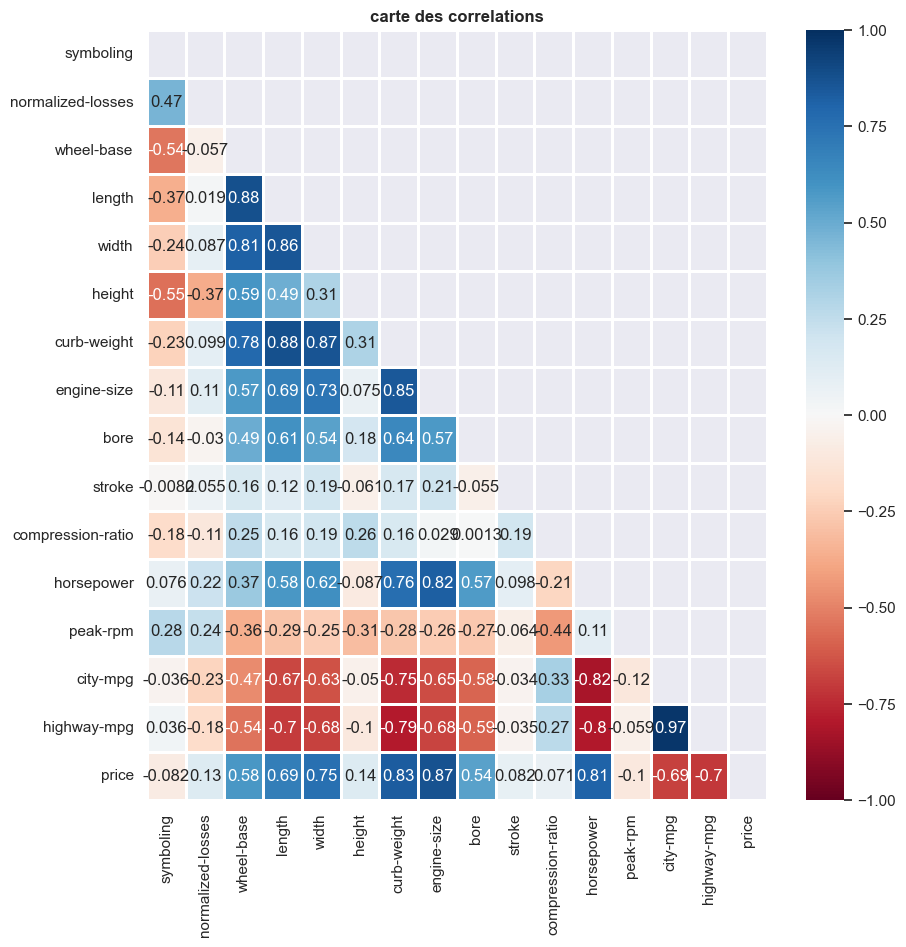

In [101]:
sns.set(rc={"figure.figsize": (10,10)})

mask=np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(df.corr(),mask=mask, center=0, cmap='RdBu', linewidths=1, annot=True, fmt=".2", vmin=-1, vmax=1)

plt.title("carte des correlations",  fontweight="bold")

plt.show()

En examinant les coefficients de corrélations , nous détectons les potententiels prédicteurs du prixd'une voiture.pour chaque variable numèrique potentiellement prédicteur du prix, nous ferons une régression linèaire simple entre elle la variable price
afficher le coefficient de corrélation de pearson et ainsi que sa P-value.

y=ax +b

y: est la variable dépendante( variable d'intéret, ou cible)
x: est la variable indépendante(ou prédicteur)
 a etb sont les paramètres du modèle( a : est la pente de la droite d'ajustement, etb est l'ordonnée à l'origine)

commencons par definir une fonction qui automatise cette tache afin dene pascopier et coller du code.

In [102]:
# définition d'une fonction slrViz_corr

def slrViz_corr(var):
    sns.regplot(x=var, y=df['price'])
    plt.ylim(0,)
    
    pearson_coef, P_value=stats.pearsonr(var,df['price'])
    
    return print("Le coefficientde correlation de pearson est", pearson_coef, "avecune p-value de", p-value)

# wheel-base VS price
la variable wheel base représente la distanceentre les essieux avant et arrière d'un véhicule

In [103]:
# wheel-base VS price
Régression linéaire simple de "price" en fonction de "wheel-base"

slrViz_corr(df['wheel-base'])

SyntaxError: invalid syntax (2508769956.py, line 2)

NameError: name 'p' is not defined

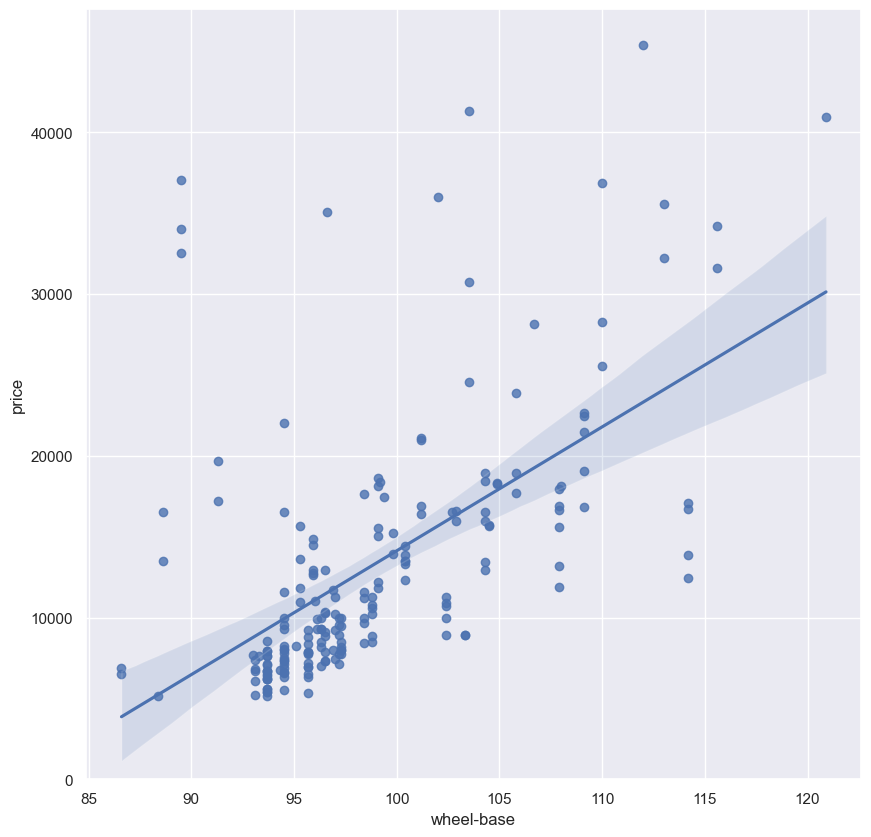

In [104]:
slrViz_corr(df['wheel-base'])

In [ ]:
le coefficient de correlationde pearsonest de 0.58 avec une p-value de 8.07.e**20

In [ ]:
La corrrelation entre les variables wheel-base VS price est statistiquement
significative(p-value inférieurà 0.001) bien que la relation linèaire n'est pas très forte.

In [ ]:
length VS price

NameError: name 'p' is not defined

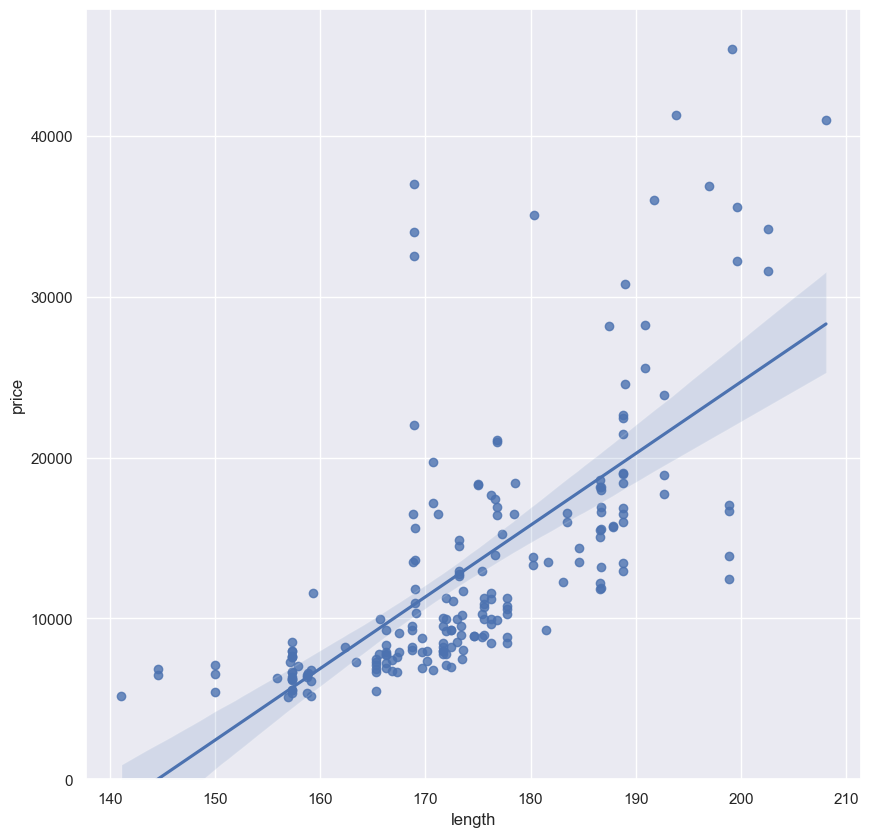

In [105]:
slrViz_corr(df['length'])

In [ ]:
le coefficient de correlationde pearson est de 0.69 avec une p-value de 8.07

In [ ]:
La corrrelation est forte  entre les vaibles length VS price est statistiquement
significative(p-value inférieurà 0.001) bien que la relation linèaire n'est pas très forte.

In [ ]:
# width VS price

In [ ]:
# Regression lineaire simple de  "price" en fonction de "width"

NameError: name 'p' is not defined

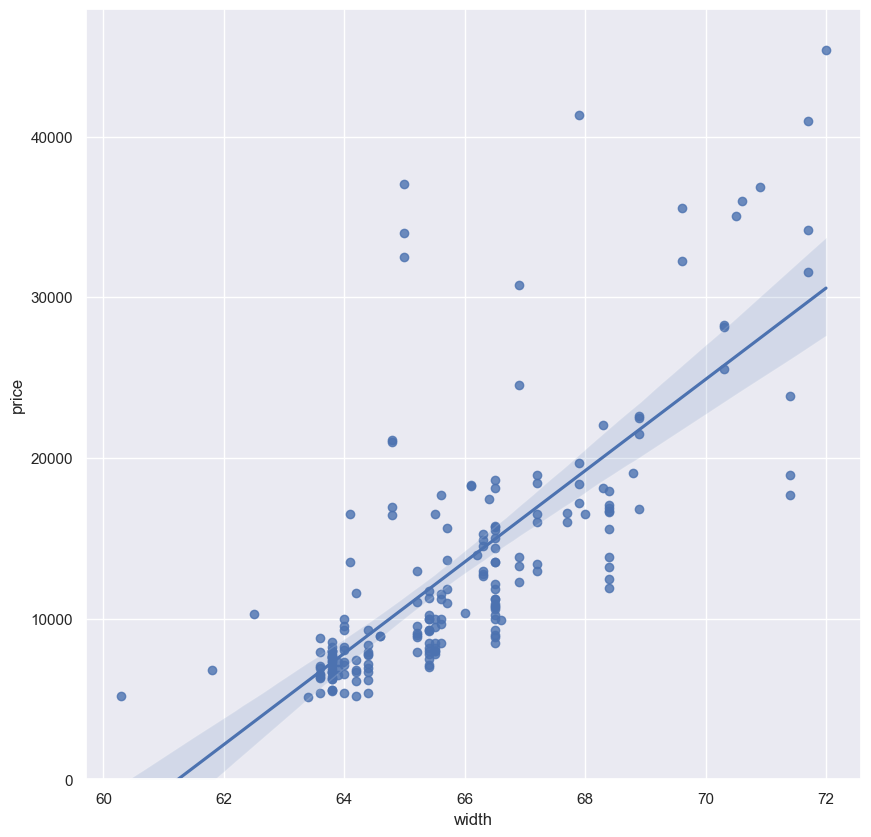

In [106]:
slrViz_corr(df['width'])

In [ ]:
Ily'aune très forte corrélation positive et statistiquement significative(p-value inférieur à 0,001) 
entre les varibles width et price.

In [ ]:
# curb-weight VS price

In [ ]:
la varible curb-weight représente le poids à vide d'une voiture c'est-à-dire son poids sans occupant ni bagages.

In [ ]:
# Regression lineaire simple de  "price" en fonction de "curb-weight"

NameError: name 'p' is not defined

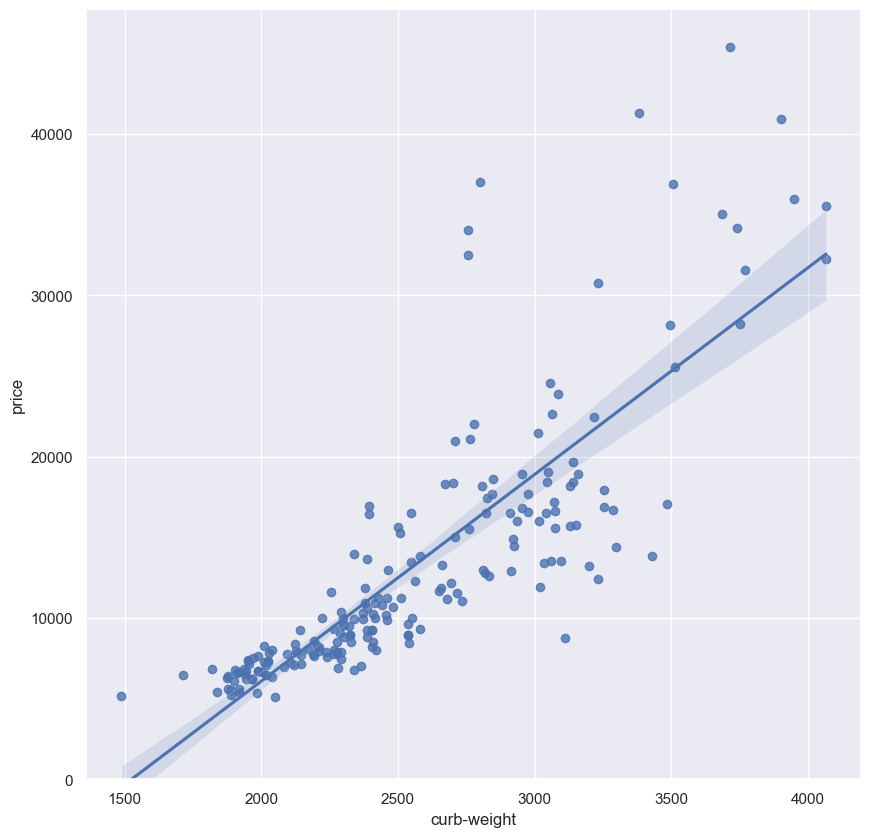

In [107]:
slrViz_corr(df["curb-weight"])

In [ ]:
Il y'a une correlation positive extremement forte et statistiquement significative(Pçvalue inférieur à 0,001) 
entre les variables curb-weight et price

In [ ]:
# engine-size VS price
la variable engine-size représente la taille du moteur.

In [ ]:
# Regression lineaire simple de  "price" en fonction de "engine-size"

NameError: name 'p' is not defined

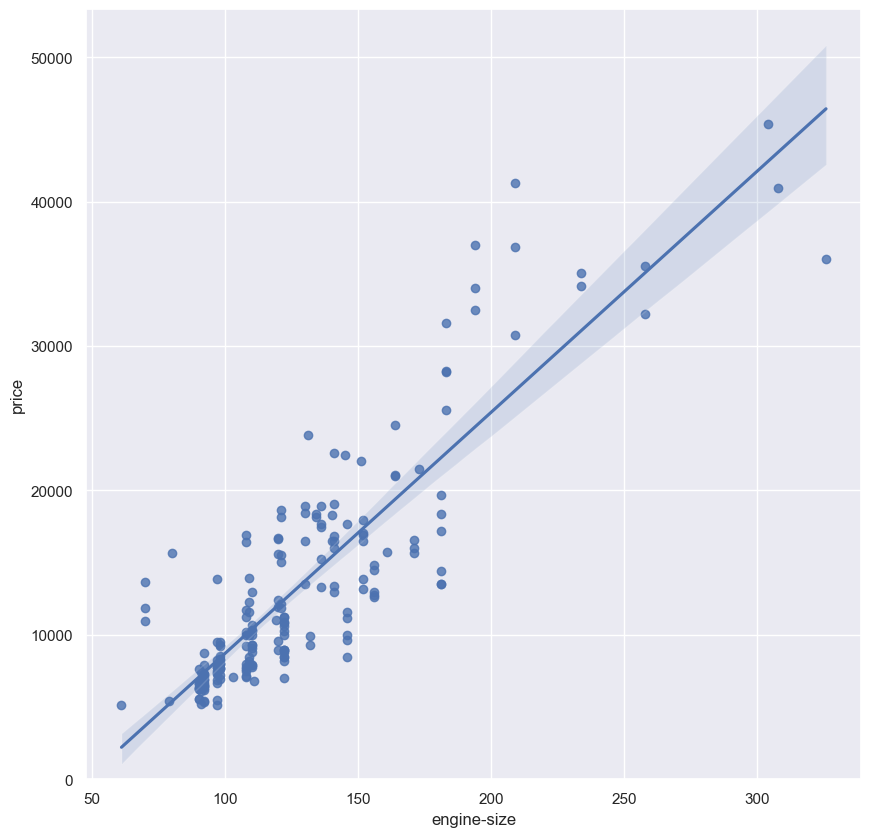

In [108]:
slrViz_corr(df["engine-size"])

In [ ]:
l y'a une correlation positive extremement forte et statistiquement significative(Pçvalue inférieur à 0,001) 
entre les variables engine-size et price

In [ ]:
# bore VS price
la variable bore représente le diamètre du cylindre de la jante. 

NameError: name 'p' is not defined

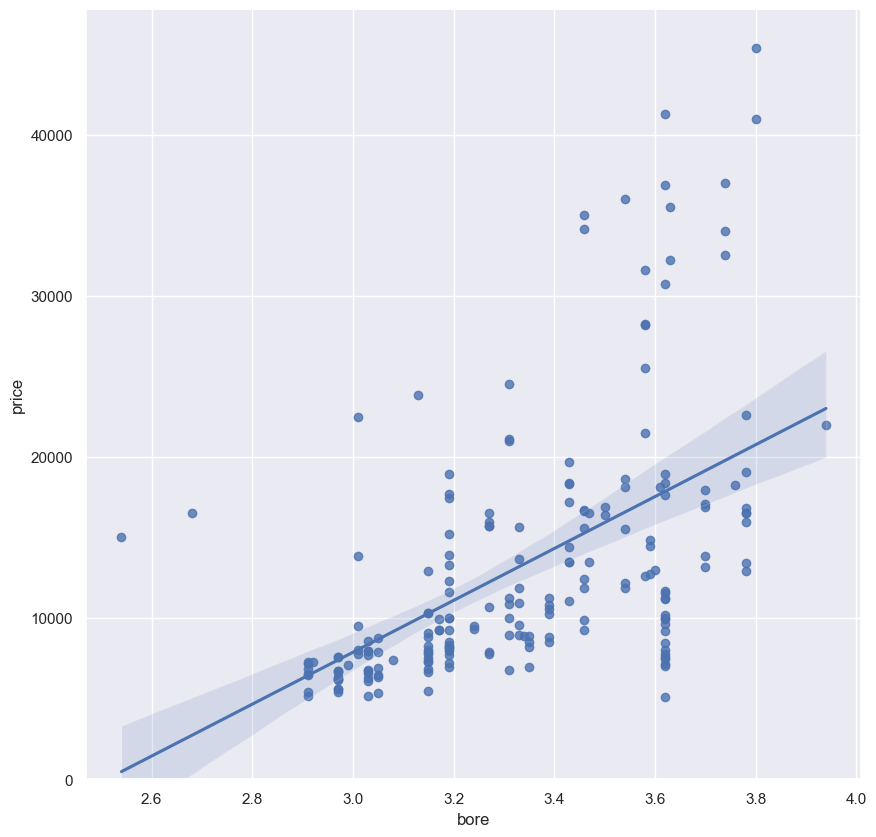

In [109]:
# Regression lineaire simple de  "price" en fonction de "bore"
slrViz_corr(df["bore"])

La corrrelation entre les variables "bore" et "price"  est statistiquement
significative(p-value inférieurà 0.001) bien que la relation linèaire n'est pas très forte.

In [ ]:
# horsepower VS price
horsepower reprèsente la puissance du moteur(une unité de puissance égale à 745,7watts).

NameError: name 'p' is not defined

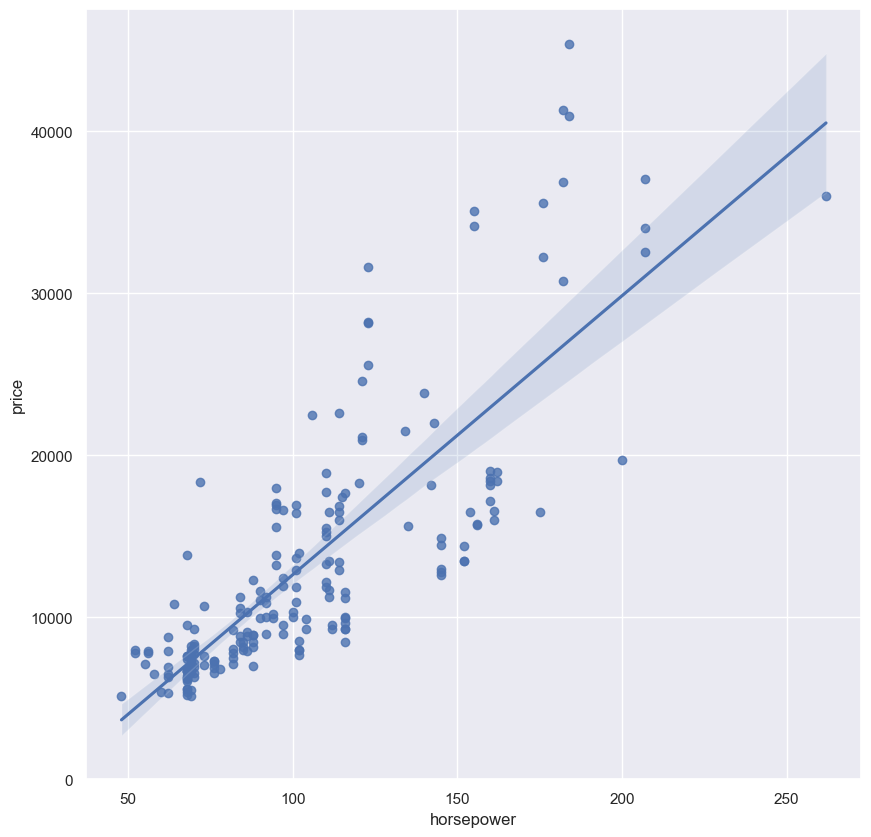

In [110]:
# Regression lineaire simple de  "price" en fonction de "bore"
slrViz_corr(df["horsepower"])

In [ ]:
ll y'a une très forte correlation positive  et statistiquement significative(P-value inférieur à 0,001) 
entre la puissance du moteur et le prix de la voiture.
Autrement dit, plus le moteur est puissant, plus le prix de la voitureest élevé.

In [ ]:
# city-mpg VS price
city-mpg reprèsente la consommation en carburant de la voiture en agglomération.
Elle est donnée en miles par galon.pour trouverla consommation en litre/ 100 Km, 
il faut diviser 235 par la consommation en miles/gallon.

NameError: name 'p' is not defined

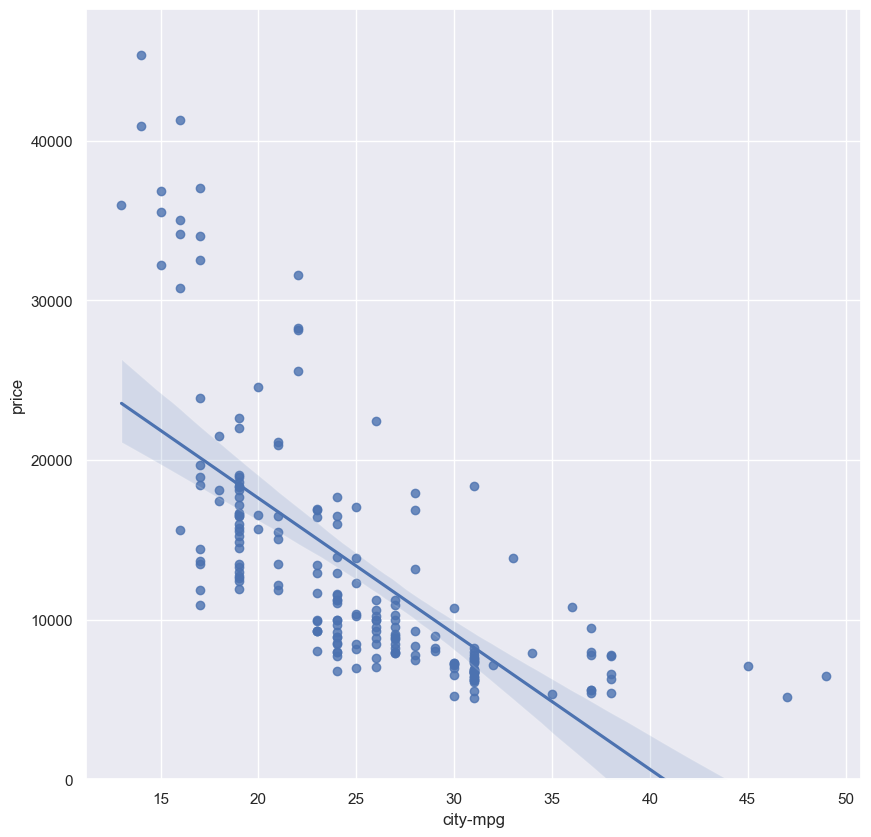

In [111]:
# Regression lineaire simple de  "price" en fonction de "bore"
slrViz_corr(df["city-mpg"])

In [ ]:
ll y'a une correlation négative  et statistiquement significative(P-value inférieur à 0,001) 
entre les variables "city-mpg" et "price".
Autrement dit, plus la consommation en
carburant (en ville )est importante, plus sa valeur (prix) baisse.

In [ ]:
# highway-mpg VS price
reprèsente la consommation en carburant de la voiture sur l'autoroute.

NameError: name 'p' is not defined

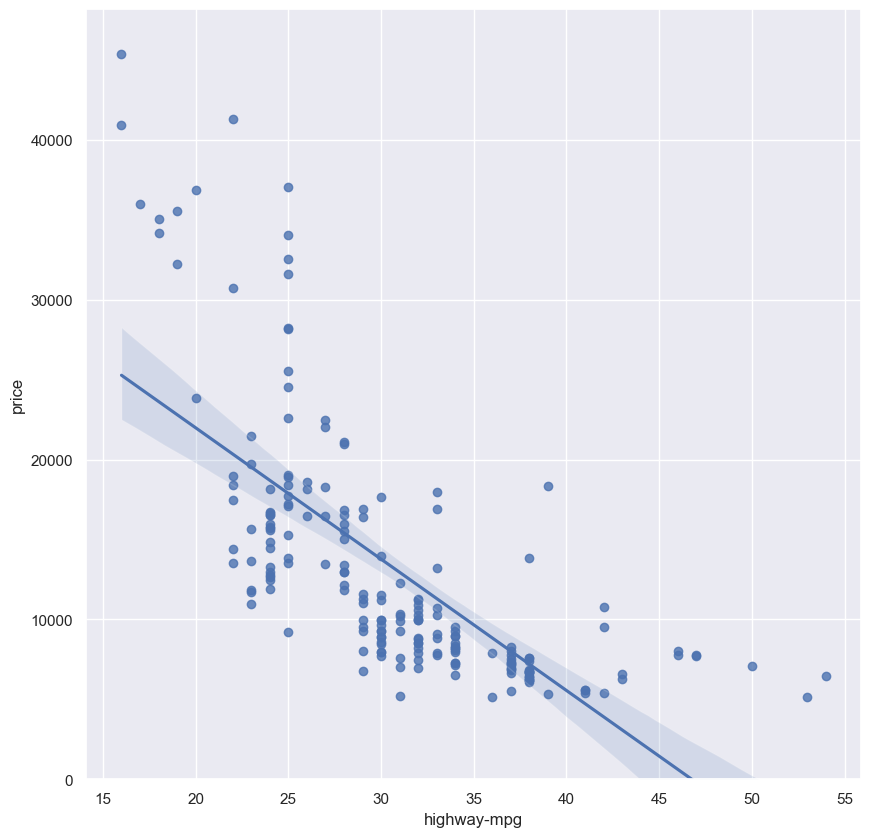

In [112]:
# Regression lineaire simple de  "price" en fonction de "highway-mpg"
slrViz_corr(df["highway-mpg"])

In [ ]:
ll y'a une très forte correlation négative  et statistiquement significative(P-value inférieur à 0,001) 
entre les variables "highway-mpg" et "price".
Autrement dit, plus la consommation en
carburant (sur l'autoroute )est importante, plus son  (prix) baisse.

In [ ]:
A travers les analyses ci-dessus nous avons déterminé les variables numèriques qui influencent le prix d'une voiture.
Qu' en est-il de la relationentre chacune des variables catégorielles  et la variable d'intéret?
Nous pouvons visualiser ces relations par des boites à moustaches.

# variable catégorielle VS variable cible

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int32  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

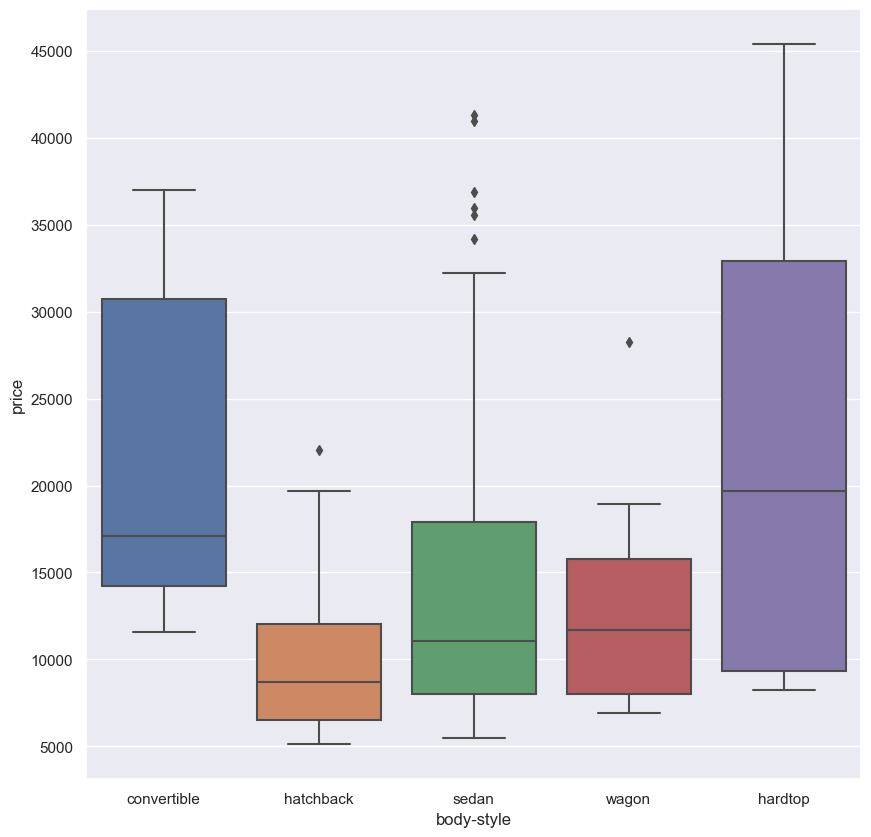

In [113]:
sns.boxplot(x="body-style", y="price", data=df);

In [ ]:
Nous voyons que les distributions de prix entre les différentes catégories de body-style ont un chevauchement important,
et donc cette variable ne serait pas un bon prédicteur de prix

In [ ]:
# engine-location vs price
la variable engine location représente l'emplacement (avant ou arrière)du moteur.

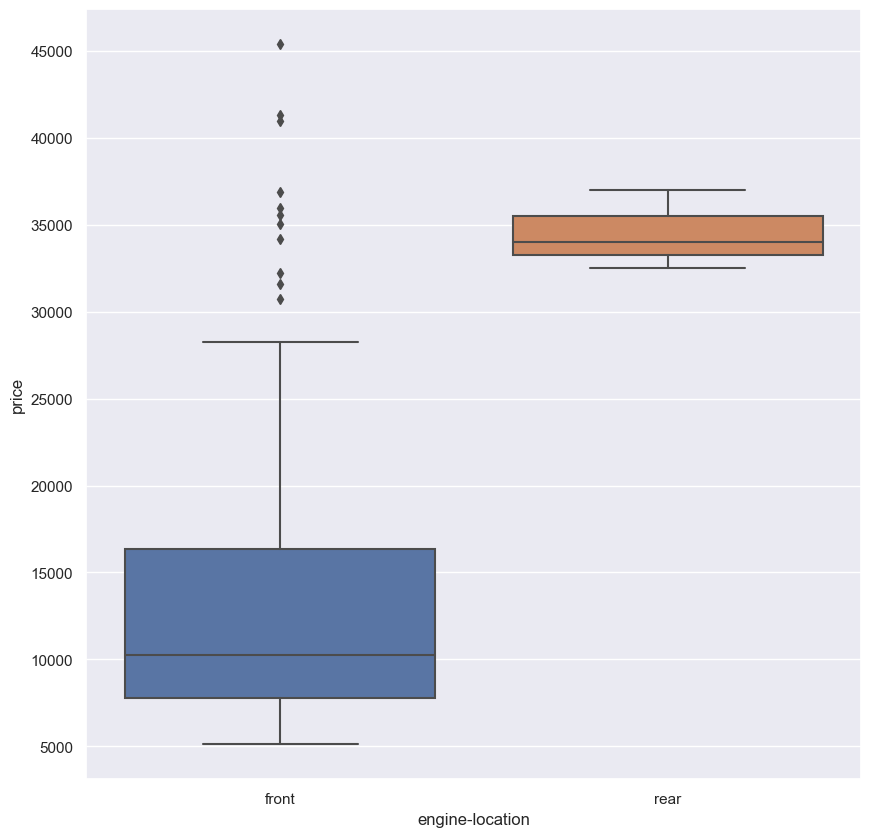

In [114]:
sns.boxplot(x="engine-location", y="price", data=df);

Les voitures avec des moteurs à l'arrière sont plus chères que les voituresavec le moteur à l'avant.

Par ailleurs il y'a seulement trois voitures qui ont un moteur à l'arrière.

Ce problème de déséquilibre de classe disqualifie la variable engine-locationcomme variable prédicteur du prix.

In [83]:
df["engine-location"].value_counts()

front    198
rear       3
Name: engine-location, dtype: int64

In [ ]:
# drive-wheels vs price
La variable drive-wheels définit les roues motrices d'une voiture.

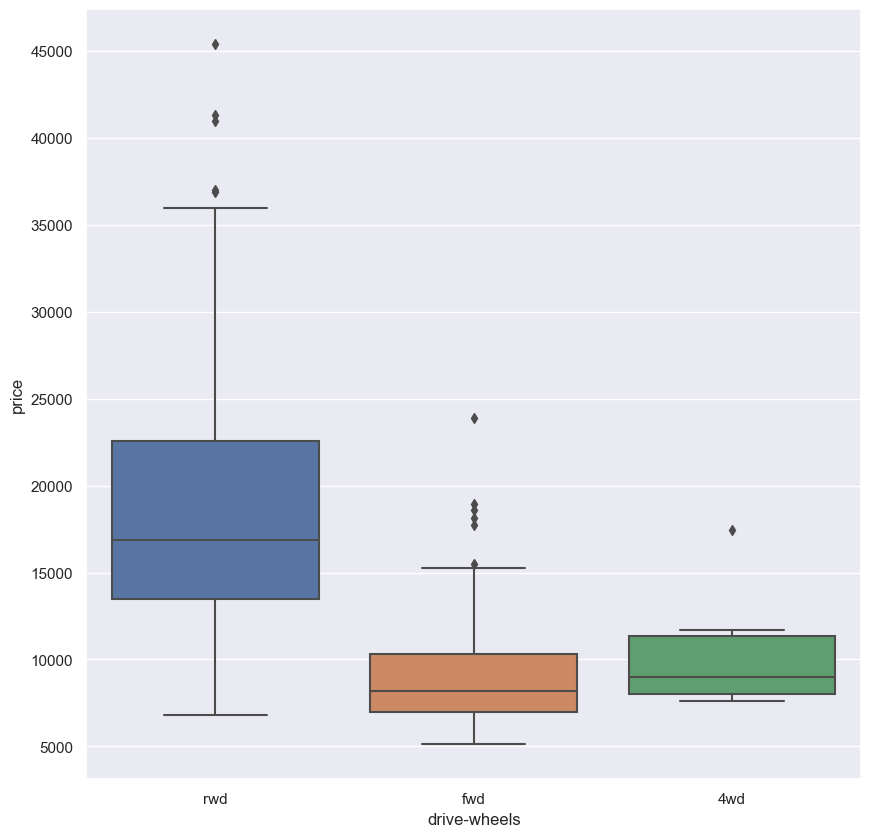

In [115]:
sns.boxplot(x="drive-wheels", y="price", data=df);

In [85]:
df["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int32  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

on voit ici que 
la répartition entre les différentes catégories de roues motrices est différente.
La variable drive-wheels pourrait potentiellemnt etre une variableprédicteur du prix d'une voiture

Cette analysedes donnéesnous permis d'avoir une meilleure idée  des variables qu'il est important de prendre en compte lors de la construction du modèle de prédiction du prix d'une voiture.Il s'agit des variables suivantes:

variables numèriques  continues: "engine-size", "curb-weight", "length", "width", "wheel-base", "horsepower", "highway-mpg","bore", "city-mpg"

In [ ]:
variable catégorielle: "drive-wheels"

# Modélisation du prix d'une voiture

# construction du modèle

Nous construirons un modèle de régression linéaire multiple pour prédire le prix de vente d'une voiture en de certaines de ses caractéristiques. Ces caractéristiques ont été déterminées lors de l'analyse exploratoire des données.

# Variable indépendante

In [122]:
X=df[["engine-size", "curb-weight", "length", "width", "wheel-base", "horsepower", "highway-mpg","bore", "city-mpg"]]

 # Variable dépendante

In [123]:
y=df["price"]

In [124]:
 # Créatio d'un modèle de régression linéaire
lm=LinearRegression()

In [127]:
# Entrainement du modèle
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [128]:
# coefficients
lm.coef_

array([   79.05419995,     3.11828375,   -72.26084531,   634.95267368,
         111.78344803,    59.42633928,   184.10851533, -1026.27963187,
        -170.06836451])

In [129]:
# ordonnée àl'origine
lm.intercept_

-49178.73573314731

In [132]:
# Evaluation du modèle
#coefficient de determination
lm.score(X, y)

0.8190670251946172

Avec ce modèlenous avons le coefficient de détermination R**2, égal environ à 0.82.Nous pouvons donc dire que le modèle capture bien les relations linèaires dans les données.En effet,plus  R**2estproche de 1, plus on a un bon modèle(R**2 varie entre 0 et 1).

Pour évaluer la qualité d'ajustement du modèle aux valeurs réelles, nous allons examiner la distribution des valeurs ajustées qui résultent du modèle et la comparer à la distributiondes valeurs réelles.

Analysons la distribution des prix calculés par le modèle et celle des prix réels.

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


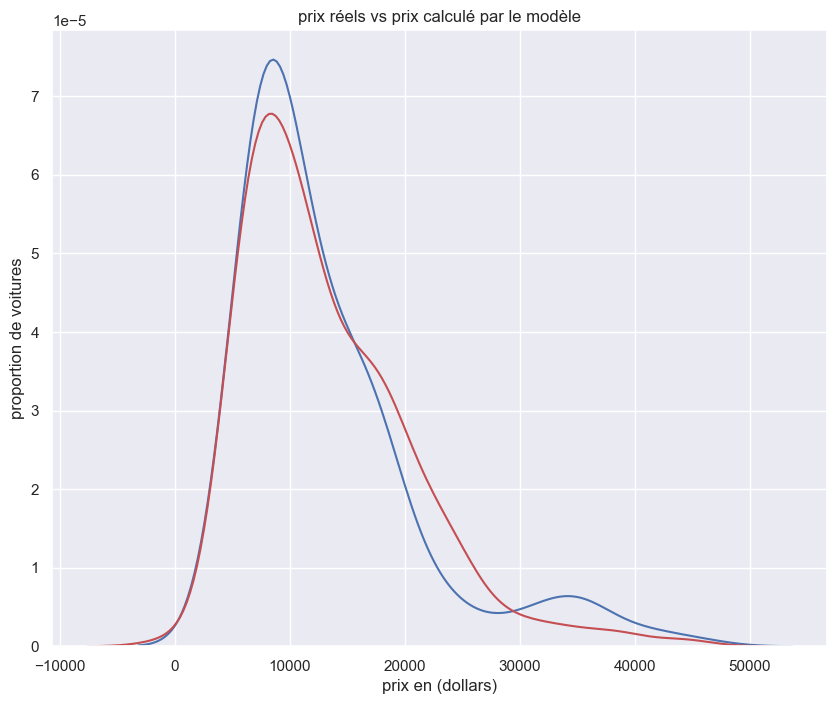

In [139]:
# Prix prédits à partir du modèle

Y_hat=lm.predict(X)

# Distribution des valeurs ajustées et des valeurs réelles

plt.figure(figsize=(10,8))

axl=sns.distplot(y, hist=False, color="b", label="prix réels")

sns.distplot(Y_hat, hist=False, color="r", label="prix calculés", ax=axl)

plt.title("prix réels vs prix calculé par le modèle")


plt.xlabel("prix en (dollars)")

plt.ylabel("proportion de voitures")

plt.show()

plt.close()

La métrique d'évaluation par défaut de la performance du modèle de régression linéaire est le coefficientde détermination.
Le coefficientde détermination est égalà 0,82 c'est-à-dire que 82% de la variation du prix est expliquée par le modèle.

Par ailleurs on remarque que les deux courbes sont parfaitement supersposées cequi veut dire que les prix calculés par le modèle sont proches des prix réels.Globalement, nouspouvons donc dire que le modèle est de bonne qualité.

Néammoins, selon le graphique il y'a une zone que le modèle ne couvre pas ce qui implique que nous pouvons  essayer d'améliorer ce modèle.

# concclusion





Ceprojet est une initiation à la régression qui est une tâche de machine Learning supervisé.Dans le but de déterminer à quel prix 'juste' onpeut vendre ouacheter une voiture, nous avons effectué la présente étude.D'abord, nous avons collectés les données pertinenteset procéder à leur nettoyage.

Ensuite, ce fussent les phases de nettoyages puis d'Analyse Exploratoire des données.Aucours de cette dernière phase nous avonspu déterminer les variables quiinfluencent lavaleur d'une voiture c'est-à-dire son prix.Enfin,nous avons construitun modèle de régression linèaire puisterminer parl'évaluation de ce modèle.

Le modèle a donné un bon résultat sur les données ayant servi à son entrainement.Maisle fait d'évaluer unmodèleuniquement surlesdonnées d'entrainement ne nous dit pas s'il est capable de bien se comporteravecde nouvelles données.Or le but ultime de la création d'un modèle est de pouvoir l'utiliser pour effectuer des prédictions avec des nouvelles données. Un modèle peutavoir untrès bon score d'entrainement et avoir une mauvaise performance sur de nouvelles données: problème de surapprentissage(OVERFITING).

Dans les projets suivants, nous verrons plusieurs techniques permettant devérifierla capacitéd'un modèle de Machine Learning à se généraliser et aussi des techniques d'amélioration de sa qualité.

In [ ]:
Fin